In [1]:
#Клюшніченко 
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Завантаження даних
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Розділення даних на навчальну (80%) та тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Створення та навчання базової лінійної регресійної моделі
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Оцінка продуктивності моделі
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Метрики якості регресії
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R^2: {r2_train}, Test R^2: {r2_test}")

Train MSE: 0.5179331255246699, Test MSE: 0.555891598695242
Train R^2: 0.6125511913966952, Test R^2: 0.5757877060324526


In [5]:
from sklearn.linear_model import Ridge

# Модель Ridge з регуляризацією
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Прогнозування
y_train_ridge_pred = ridge_reg.predict(X_train)
y_test_ridge_pred = ridge_reg.predict(X_test)

# Оцінка продуктивності моделі
mse_train_ridge = mean_squared_error(y_train, y_train_ridge_pred)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge_pred)
r2_train_ridge = r2_score(y_train, y_train_ridge_pred)
r2_test_ridge = r2_score(y_test, y_test_ridge_pred)

print(f"Ridge Train MSE: {mse_train_ridge}, Ridge Test MSE: {mse_test_ridge}")
print(f"Ridge Train R^2: {r2_train_ridge}, Ridge Test R^2: {r2_test_ridge}")

Ridge Train MSE: 0.5179332149226821, Ridge Test MSE: 0.5558034669932195
Ridge Train R^2: 0.61255112452097, Ridge Test R^2: 0.5758549611440138


In [7]:
from sklearn.linear_model import Lasso

# Модель Lasso з регуляризацією
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# Прогнозування
y_train_lasso_pred = lasso_reg.predict(X_train)
y_test_lasso_pred = lasso_reg.predict(X_test)

# Оцінка продуктивності моделі
mse_train_lasso = mean_squared_error(y_train, y_train_lasso_pred)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso_pred)
r2_train_lasso = r2_score(y_train, y_train_lasso_pred)
r2_test_lasso = r2_score(y_test, y_test_lasso_pred)

print(f"Lasso Train MSE: {mse_train_lasso}, Lasso Test MSE: {mse_test_lasso}")
print(f"Lasso Train R^2: {r2_train_lasso}, Lasso Test R^2: {r2_test_lasso}")

Lasso Train MSE: 0.60300014172392, Lasso Test MSE: 0.613511519805813
Lasso Train R^2: 0.5489153425707493, Lasso Test R^2: 0.531816761031816


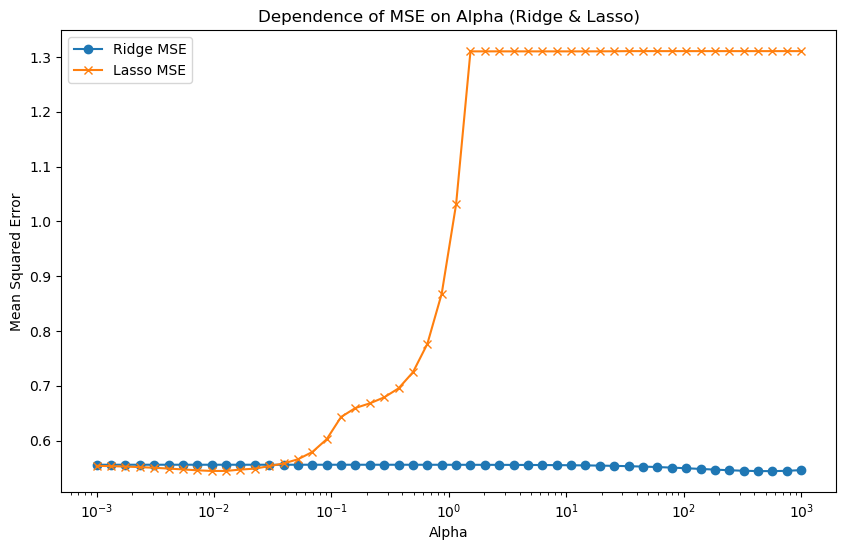

In [9]:
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 50)
ridge_mses = []
lasso_mses = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_mses.append(mean_squared_error(y_test, ridge_reg.predict(X_test)))

    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_mses.append(mean_squared_error(y_test, lasso_reg.predict(X_test)))

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mses, label='Ridge MSE', marker='o')
plt.plot(alphas, lasso_mses, label='Lasso MSE', marker='x')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Dependence of MSE on Alpha (Ridge & Lasso)')
plt.legend()
plt.show()